In [2]:
!git clone https://github.com/AusterweilLab/snafu-py
!git clone https://github.com/HNinou/MathTools_TD1
!pip install snafu-py/.

fatal: destination path 'snafu-py' already exists and is not an empty directory.
fatal: destination path 'MathTools_TD1' already exists and is not an empty directory.
Processing ./snafu-py
  Preparing metadata (setup.py) ... done
  Created wheel for pysnafu: filename=pysnafu-2.6-py3-none-any.whl size=46141 sha256=d88f4cdadc9133f5d80f0b728ff58ee4db271133082ffcff8c24101f98cae5a3
  Stored in directory: /root/.cache/pip/wheels/6c/58/1e/8a1e702e836a838a73335a15c5b6b6a04e0de3f94e3061873a
Successfully built pysnafu
  Attempting uninstall: pysnafu
    Found existing installation: pysnafu 2.6
    Uninstalling pysnafu-2.6:
      Successfully uninstalled pysnafu-2.6


In [3]:
import snafu
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import pandas as pd
import seaborn as sns

# Antique coin collection

##7)

In [4]:
### make a function with N and k that randomly chooses values of size k in range  N, calculate m, theta_hat and mu

def coin_sampling_one_experiment(N, k):
  coin_sample = np.random.choice(range(N), size = k)
  m = max(coin_sample)
  theta_hat = m*(1+1/k)-1
  mu = (m-1)*(k-1)/(k-2)
  return(m, theta_hat, mu)

print(coin_sampling_one_experiment(N=1000, k=10))

(888, 975.8000000000001, 997.875)


## 8)

In [5]:
####  redo it 10 000 times, store the values

def coin_sampling_10000_experiments(N,k):
  parameters_list = [coin_sampling_one_experiment(N,k) for i in range(10000)]

  m_list = [x[0] for x in parameters_list]
  theta_hat_list = [x[1] for x in parameters_list]
  mu_list = [x[2] for x in parameters_list]

  theta_mean = np.mean(theta_hat_list)
  mu_mean = np.mean(mu_list)
  m_mean = np.mean(m_list)

  return(m_list, theta_hat_list, mu_list)

m_list, theta_hat_list, mu_list = coin_sampling_10000_experiments(N=1000, k=10)


theta_mean = np.mean(theta_hat_list)
mu_mean = np.mean(mu_list)
m_mean = np.mean(m_list)


### You can modify the code below to plot your data or write your own

In [6]:
# Creating histograms for both distributions
fig = go.Figure()


# Plot for theta_list
fig.add_trace(go.Histogram(x=coin_sampling_10000_experiments(1000,10)[1], name='Theta Distribution', opacity=0.75, histnorm = 'percent'))

# Plot for mu_list
fig.add_trace(go.Histogram(x=coin_sampling_10000_experiments(1000,10)[2], name='Mu Distribution', opacity=0.75, histnorm = 'percent'))

# Plot for m_list
fig.add_trace(go.Histogram(x=coin_sampling_10000_experiments(1000,10)[0], name='m Distribution', opacity=0.75, histnorm = 'percent'))

# Add vertical lines for the mean values
fig.add_vline(x=theta_mean, line=dict(color='blue', dash='dash'), annotation_text='Theta Mean', annotation_position="top left")
fig.add_vline(x=mu_mean, line=dict(color='red', dash='dash'), annotation_text='Mu Mean', annotation_position="top right")
fig.add_vline(x=m_mean, line=dict(color='green', dash='dash'), annotation_text='m Mean', annotation_position="top right")

# Update layout
fig.update_layout(
    title="Distributions of Theta and Mu",
    xaxis_title="Values",
    yaxis_title="Count",
    barmode='overlay',
    bargap=0.1
)

# Show the plot
fig.show()


## 9)

In [7]:

num_ks = 20
nb_samples = 10000

N = 1000
k_list = np.linspace(3,200, num = 20) ## arange from 3 to 200, size 20


meta_list_sampling_k_list = np.array([coin_sampling_10000_experiments(N=1000, k=int(i)) for i in k_list]) ### assign for each

m_list = np.array([x[0] for x in meta_list_sampling_k_list])
theta_hat_list = np.array([x[1] for x in meta_list_sampling_k_list])
mu_list = np.array([x[2] for x in meta_list_sampling_k_list])

######## storing in arrays above !


## 10)


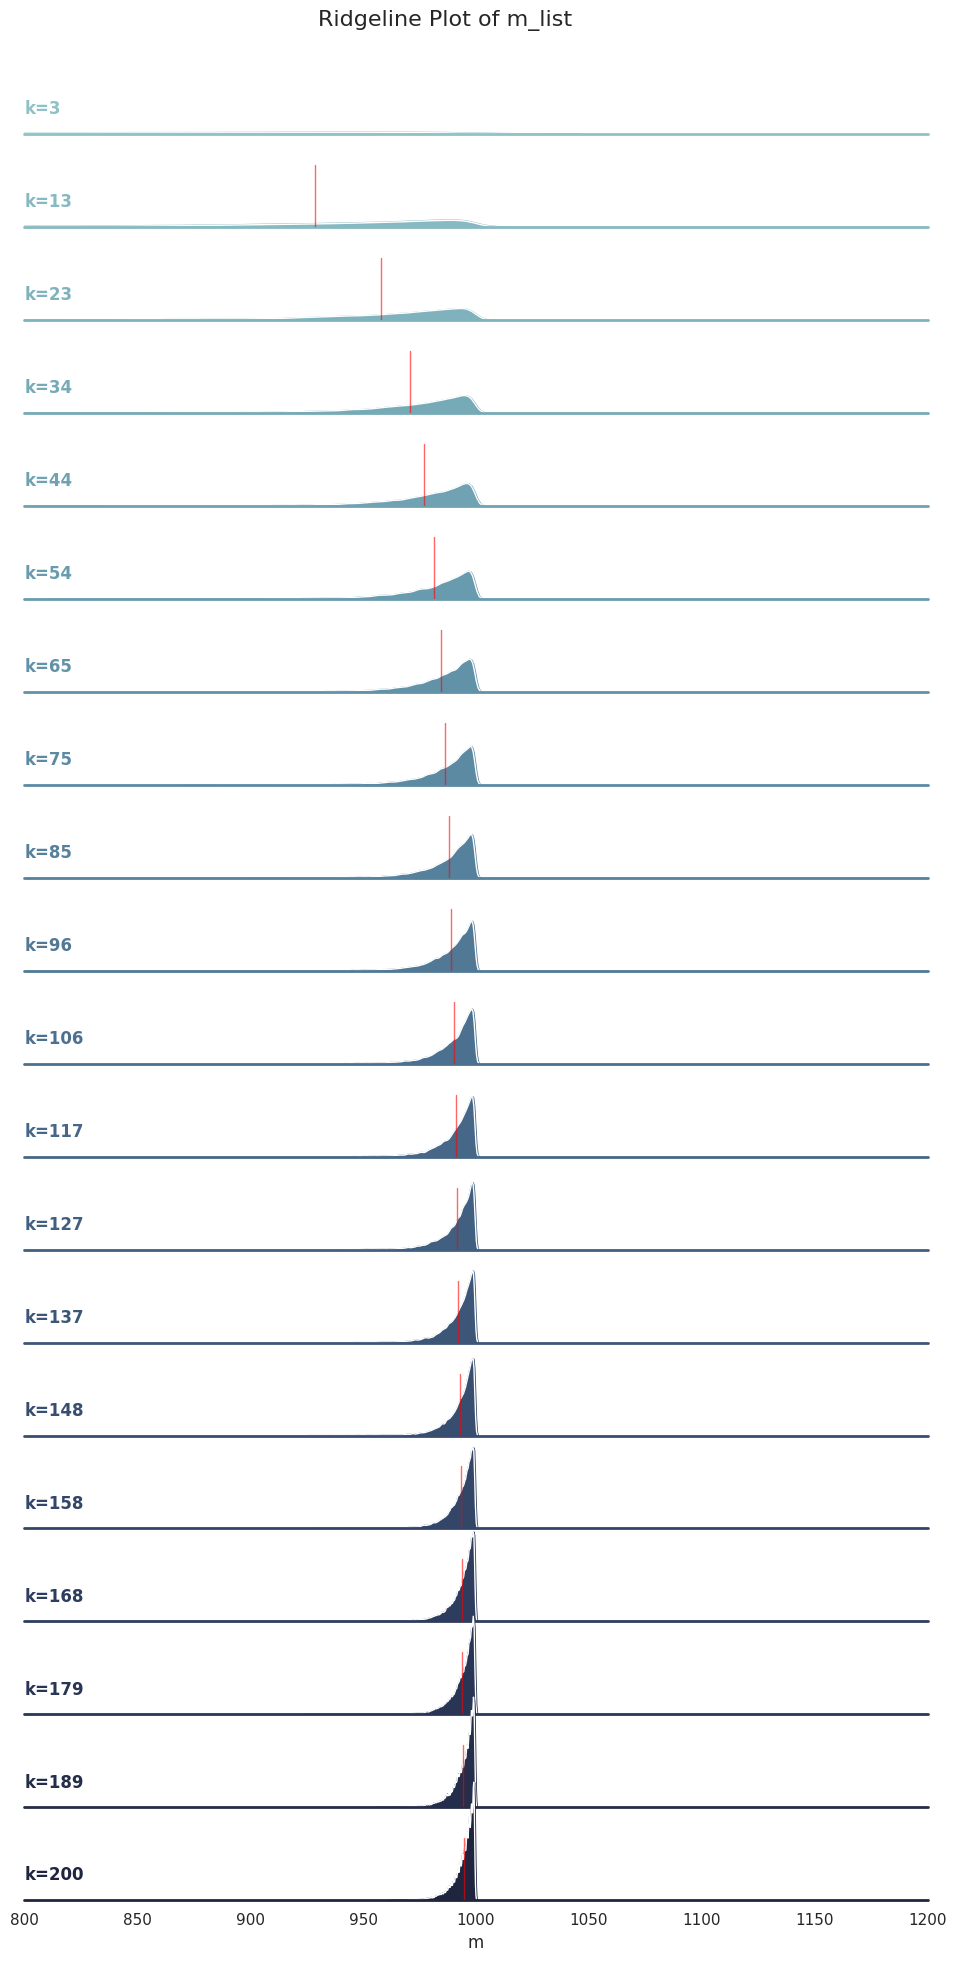

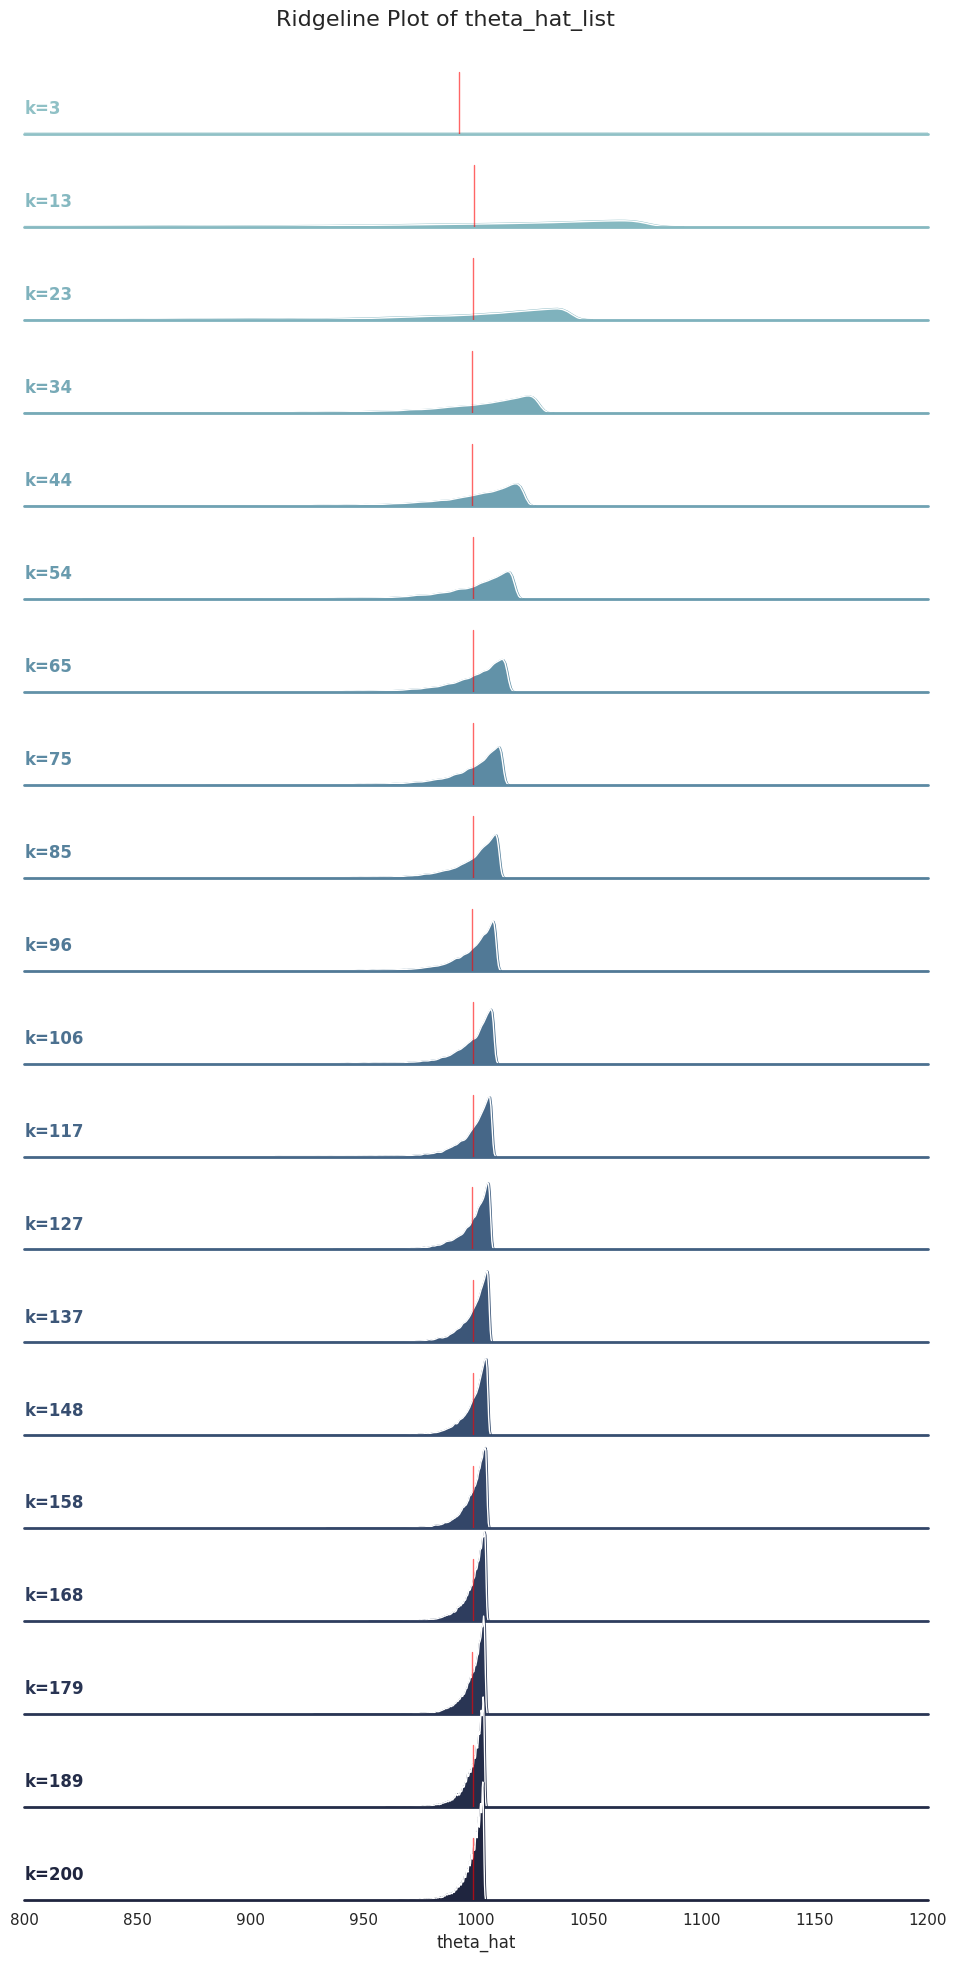

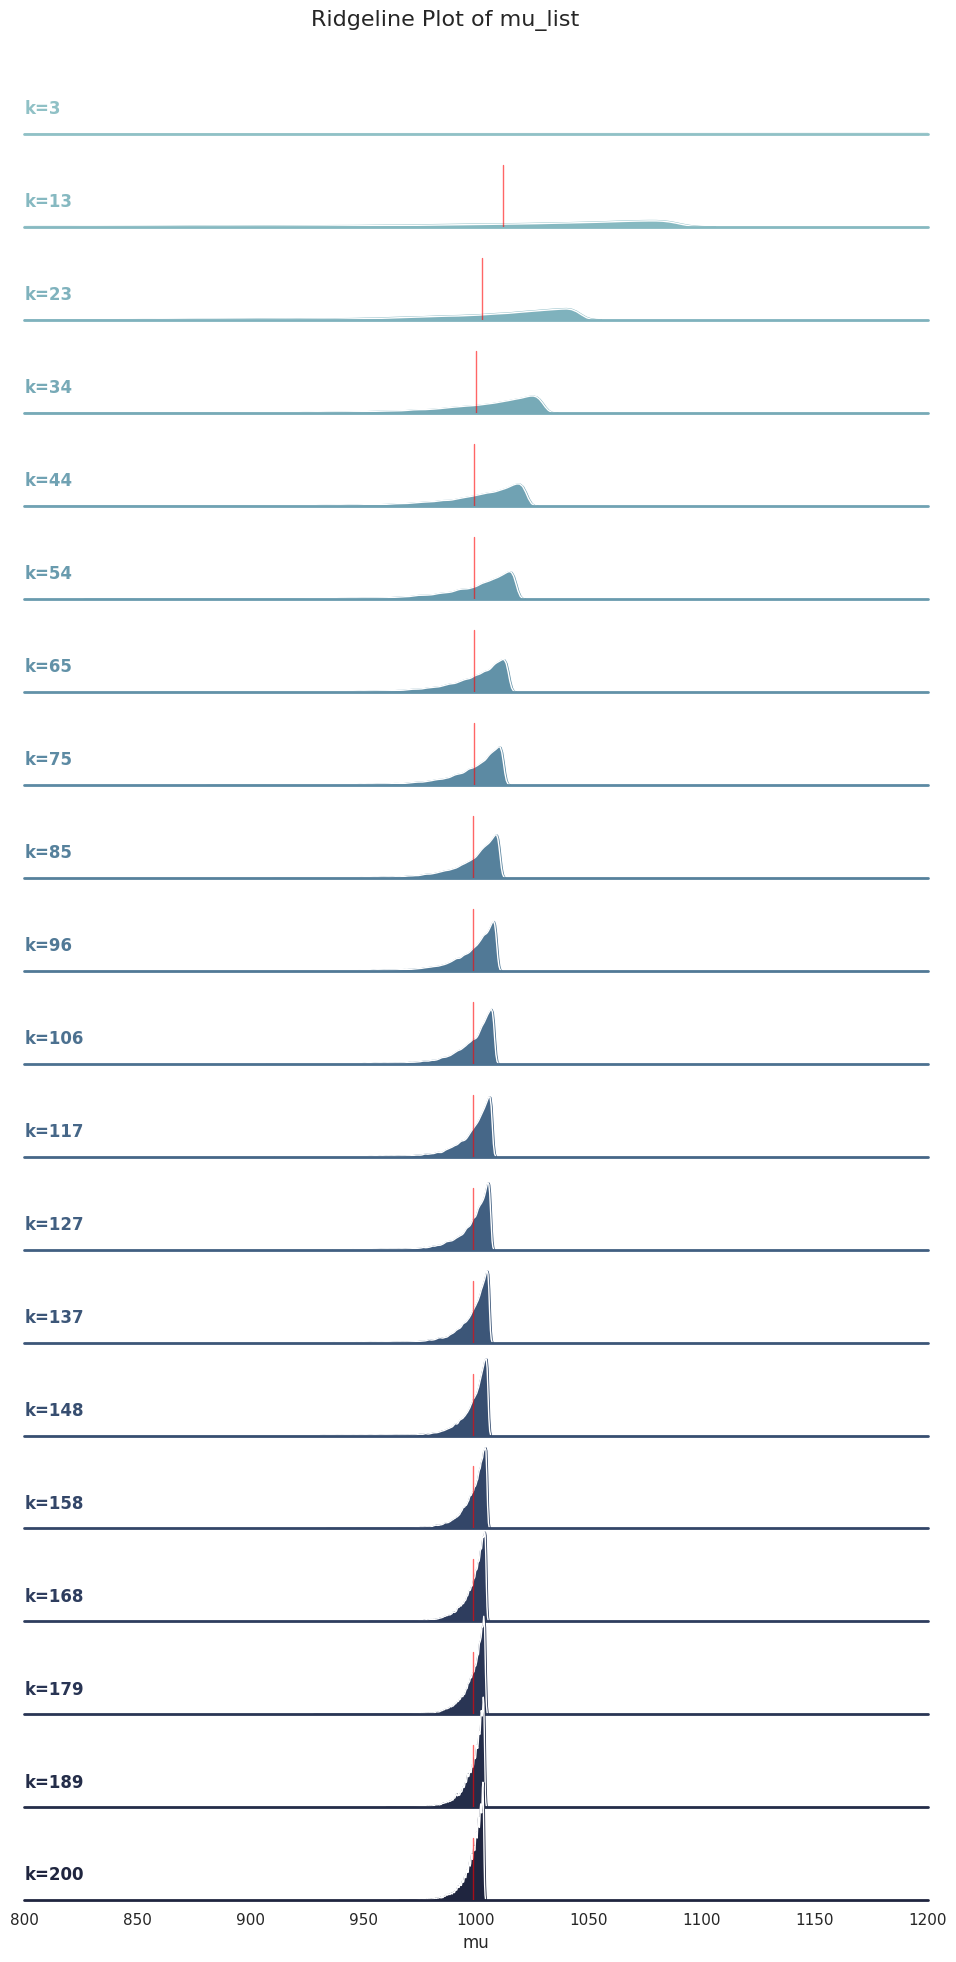

In [8]:
# Set the theme for the plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Function to create a dataframe for each array (m_list, theta_hat_list, mu_list)
def create_dataframe(array, name):
    df = pd.DataFrame(array.T, columns=[f'k={int(k_list[i])}' for i in range(num_ks)])
    df_melted = df.melt(var_name='k', value_name=name)
    return df_melted


# Create dataframes for each list
m_df = create_dataframe(m_list, 'm')
theta_hat_df = create_dataframe(theta_hat_list, 'theta_hat')
mu_df = create_dataframe(mu_list, 'mu')


# Function to calculate and plot vertical line at the mean of each distribution
def add_mean_line(data, **kwargs):
    mean_value = data.mean()
    plt.axvline(x=mean_value, color='red', alpha = 0.6, linestyle='-', lw=1, ymax = 0.5)


# Function to create ridgeline plot with FacetGrid
def ridgeline_plot(data, var_name, title):
    # Define the color palette
    pal = sns.cubehelix_palette(num_ks, rot=-.25, light=.7)

    # Initialize the FacetGrid object
    g = sns.FacetGrid(data, row="k", hue="k", aspect=10, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, var_name,
          bw_adjust=.5, clip_on=(800,1200),
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, var_name, clip_on=(800,1200), color="w", lw=1, bw_adjust=.5)

    # Add a reference line for better visualization
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Add vertical lines for the mean of each distribution
    g.map(add_mean_line, var_name)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, var_name)
    g.set(xlim=(800,1200))
    # Set the subplots to overlap and adjust spacing
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    plt.suptitle(title, fontsize=16)
    plt.show()

# Ridgeline plot for m_list
ridgeline_plot(m_df, 'm', 'Ridgeline Plot of m_list')

# Ridgeline plot for theta_hat_list
ridgeline_plot(theta_hat_df, 'theta_hat', 'Ridgeline Plot of theta_hat_list')

# Ridgeline plot for mu_list
ridgeline_plot(mu_df, 'mu', 'Ridgeline Plot of mu_list')


# **10) answer:**
 for Mu, Theta hat and m, as k increases they all converge. However, only theta hat converges to the true maximum, thats is to maximum=1000. It is the only unbiased estimator.

- m: consistent and biased
- theta hat: consistent and unbiased
- mu : consistent and biased
-----------
 The estimator m is consistent, because as the sample size (in our case k) increases, the estimator converges to the true parameter value N.
 However m is biased, as it will systematically underestimate N.  This is because the maximum collected serial number is typically less than the true maximum.

 The estimator Theta hat is consistent, it adjusts m by a factor (1+1/k), as k increases, this adjustment becomes ~1, and thus Theta hat converges to the true parameter N: it is consistent. It is unbiased because it truly estimates N, it gives back the true value.

 Similarly for Mu, it also adjusts by a factor and will converge to N: it is consistent. Biased, because it over-erestimates N.

 Therefore we can say they are all consistent but only theta hat is consistent.

 ---------------------------------------------------------------

 **We should prefer Theta hat, because it is unbiased and consistent, and because even for small values of k, it remains close to the value it converges to.**

#             
-----------------

# **Exercise 2**

# Analyzing knowledge retrieval impairments associated with Alzheimer's disease

Run the cell below to retrieve the data.

In [9]:
fluencydata_NC = snafu.load_fluency_data("MathTools_TD1/ucsd_fluency.csv", category='animals',
                                      removeNonAlphaChars = True,
                                      spell = 'snafu-py/spellfiles/animals_snafu_spellfile.csv',
                                      group = ['NC'],
                                      hierarchical = True,
                                      removeIntrusions = True, scheme = 'snafu-py/schemes/animals_snafu_scheme.csv',
                                      removePerseverations = True)

fluencydata_PAD = snafu.load_fluency_data("MathTools_TD1/ucsd_fluency.csv", category='animals',
                                      removeNonAlphaChars = True,
                                      spell = 'snafu-py/spellfiles/animals_snafu_spellfile.csv',
                                      group = ['ProbAD'],
                                      hierarchical = True,
                                      removeIntrusions = True, scheme = 'snafu-py/schemes/animals_snafu_scheme.csv',
                                      removePerseverations = True)

## 1)

In [10]:
print("NC values")
print("---------------------------------------")
nb_NC = len(fluencydata_NC.labeledlists)
print("number of patients NC:", nb_NC)
nb_lists_nc = sum(len(sublist) for sublist in fluencydata_NC.lists)
print("number of lists of patients NC:", nb_lists_nc)
nb_items_nc = sum(len(subsublist) for subsublist in fluencydata_NC.items)
print("number of items of lists of patients NC:", nb_items_nc)

NC values
---------------------------------------
number of patients NC: 97
number of lists of patients NC: 821
number of items of lists of patients NC: 5747


In [11]:
print("PAD values")
print("---------------------------------------")
nb_PAD = len(fluencydata_PAD.labeledlists)
print("number of patients PAD:", nb_PAD)
nb_lists_pad = sum(len(sublist) for sublist in fluencydata_PAD.lists)
print("number of lists of patients PAD:", nb_lists_pad)
nb_items_pad = sum(len(subsublist) for subsublist in fluencydata_PAD.items)
print("number of items of lists of patients PAD:", nb_items_pad)

PAD values
---------------------------------------
number of patients PAD: 61
number of lists of patients PAD: 282
number of items of lists of patients PAD: 1555


## 1) answer: NC participants have more lists (and more items in the lists). This makes sense because they have less semantic memory impairment and can thus retrieve more: leading to longer lists.

# 2)

In [12]:
#### NC

networks_nc = []

aspl_nc =[]
diameter_nc = []
number_of_nodes_nc = []
number_of_edges_nc = []
nodedegree= []
for i in range(nb_NC):
  naive_network = snafu.naiveRandomWalk(fluencydata_NC.lists[i])
  networks_nc.append(naive_network)
  # Create a graph from the adjacency matrix
  G = nx.from_numpy_array(naive_network)


  aspl_nc.append(nx.average_shortest_path_length(G))
  diameter_nc.append(nx.diameter(G))
  number_of_nodes_nc.append(nx.number_of_nodes(G))
  number_of_edges_nc.append(nx.number_of_edges(G))
  nodedegree.append((nx.number_of_edges(G)*2)/nx.number_of_nodes(G))


In [13]:
#### PAD

networks_pad = []

aspl_pad =[]
diameter_pad = []
number_of_nodes_pad = []
number_of_edges_pad = []
nodedegree= []
for i in range(nb_PAD):
  naive_network = snafu.naiveRandomWalk(fluencydata_PAD.lists[i])
  networks_pad.append(naive_network)
  # Create a graph from the adjacency matrix
  G = nx.from_numpy_array(naive_network)

  if not nx.is_connected(G):

    aspl_pad.append(np.nan)
    diameter_pad.append(np.nan)
    number_of_nodes_pad.append(np.nan)
    number_of_edges_pad.append(np.nan)
    nodedegree.append(np.nan)

  else:
    aspl_pad.append(nx.average_shortest_path_length(G))
    diameter_pad.append(nx.diameter(G))
    number_of_nodes_pad.append(nx.number_of_nodes(G))
    number_of_edges_pad.append(nx.number_of_edges(G))
    nodedegree.append((nx.number_of_edges(G)*2)/nx.number_of_nodes(G))

mean_aspl_pad = np.nanmean(aspl_pad)
mean_diameter_pad = np.nanmean(diameter_pad)
mean_nodes_pad = np.nanmean(number_of_nodes_pad)
mean_edges_pad = np.nanmean(number_of_edges_pad)


# 3)

In [14]:
# NC
print("NC")
mean_aspl_nc = np.mean(aspl_nc)
print("mean_aspl_nc:", mean_aspl_nc)
mean_diameter_nc = np.mean(diameter_nc)
print("mean_diameter_nc:", mean_diameter_nc)
mean_nodes_nc = np.mean(number_of_nodes_nc)
print("mean_nodes_nc:", mean_nodes_nc)
mean_edges_nc = np.mean(number_of_edges_nc)
print("mean_edges_nc:", mean_edges_nc)


# ----------------------------------------------------------------------------------------
# PAD
print("--------------------------------")
print("PAD")
print("mean_aspl_pad:", mean_aspl_pad)
print("mean_diameter_pad:", mean_diameter_pad)
print("mean_nodes_pad:", mean_nodes_pad)
print("mean_edges_pad:", mean_edges_pad)


NC
mean_aspl_nc: 3.76495299135124
mean_diameter_nc: 9.556701030927835
mean_nodes_nc: 59.24742268041237
mean_edges_nc: 113.69072164948453
--------------------------------
PAD
mean_aspl_pad: 3.4822383261109278
mean_diameter_pad: 8.288135593220339
mean_nodes_pad: 25.508474576271187
mean_edges_pad: 36.45762711864407


### You can modify the code below to plot your data or write your own

In [15]:
# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Average Shortest Path Length", "Diameter", "Number of Nodes", "Number of Edges"))

# Histogram for aspl_nc
fig.add_trace(go.Histogram(x=aspl_nc, name="Average Shortest Path Length"), row=1, col=1)
# Add mean line for aspl_nc
fig.add_trace(go.Scatter(x=[mean_aspl_nc, mean_aspl_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean ASPL"), row=1, col=1)

# Histogram for diameter_nc
fig.add_trace(go.Histogram(x=diameter_nc, name="Diameter"), row=1, col=2)
# Add mean line for diameter_nc
fig.add_trace(go.Scatter(x=[mean_diameter_nc, mean_diameter_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Diameter"), row=1, col=2)

# Histogram for number_of_nodes_nc
fig.add_trace(go.Histogram(x=number_of_nodes_nc, name="Number of Nodes"), row=2, col=1)
# Add mean line for number_of_nodes_nc
fig.add_trace(go.Scatter(x=[mean_nodes_nc, mean_nodes_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Nodes"), row=2, col=1)

# Histogram for number_of_edges_nc
fig.add_trace(go.Histogram(x=number_of_edges_nc, name="Number of Edges"), row=2, col=2)
# Add mean line for number_of_edges_nc
fig.add_trace(go.Scatter(x=[mean_edges_nc, mean_edges_nc], y=[0, nb_NC//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Edges"), row=2, col=2)

# Update layout with title and axis labels
fig.update_layout(
    title="Histograms of Network Quantities",
    height=600, width=800,  # Customize figure size
    showlegend=False,  # Hides individual legends
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text="Average Shortest Path Length", row=1, col=1)
fig.update_xaxes(title_text="Diameter", row=1, col=2)
fig.update_xaxes(title_text="Number of Nodes", row=2, col=1)
fig.update_xaxes(title_text="Number of Edges", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the figure
fig.show()


### You can modify the code below to plot your data or write your own

In [16]:
# Create a 2x2 subplot grid
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("Average Shortest Path Length", "Diameter", "Number of Nodes", "Number of Edges"))

# Histogram for aspl_pad
fig.add_trace(go.Histogram(x=aspl_pad, name="Average Shortest Path Length"), row=1, col=1)
# Add mean line for aspl_pad
fig.add_trace(go.Scatter(x=[mean_aspl_pad, mean_aspl_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean ASPL"), row=1, col=1)

# Histogram for diameter_pad
fig.add_trace(go.Histogram(x=diameter_pad, name="Diameter"), row=1, col=2)
# Add mean line for diameter_pad
fig.add_trace(go.Scatter(x=[mean_diameter_pad, mean_diameter_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Diameter"), row=1, col=2)

# Histogram for number_of_nodes_pad
fig.add_trace(go.Histogram(x=number_of_nodes_pad, name="Number of Nodes"), row=2, col=1)
# Add mean line for number_of_nodes_pad
fig.add_trace(go.Scatter(x=[mean_nodes_pad, mean_nodes_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Nodes"), row=2, col=1)

# Histogram for number_of_edges_pad
fig.add_trace(go.Histogram(x=number_of_edges_pad, name="Number of Edges"), row=2, col=2)
# Add mean line for number_of_edges_pad
fig.add_trace(go.Scatter(x=[mean_edges_pad, mean_edges_pad], y=[0, nb_PAD//2], mode="lines", line=dict(color="red", dash="dash"),
                         name="Mean Edges"), row=2, col=2)

# Update layout with title and axis labels
fig.update_layout(
    title="Histograms of Network Quantities",
    height=600, width=800,  # Customize figure size
    showlegend=False,  # Hides individual legends
)

# Update x-axis and y-axis titles for each subplot
fig.update_xaxes(title_text="Average Shortest Path Length", row=1, col=1)
fig.update_xaxes(title_text="Diameter", row=1, col=2)
fig.update_xaxes(title_text="Number of Nodes", row=2, col=1)
fig.update_xaxes(title_text="Number of Edges", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

# Show the figure
fig.show()


# **3) answer:** The distributions seem similar for aspl and diamter, but there is a difference in the mean number of Nodes and number of Edges: the AD patients have less.

(this makes sense as they have less fluency lists (and smaller fluency lists).)

# **4) answer:** Permutation test

# 5)

In [17]:
def generate_random_permutation(f_list):
    shuffled_list = list(f_list)
    size = len(shuffled_list)

    for idx in range(size):
        swap_idx = np.random.randint(idx, size)  # Generate a random index for swapping
        shuffled_list[idx], shuffled_list[swap_idx] = shuffled_list[swap_idx], shuffled_list[idx]  # Swap elements 2 by 2: assign each idx and swap idx their values

    return shuffled_list

def generate_permuted_lists(fluency_data):
    randomized_fluency_lists = []

    for person_idx, person_data in enumerate(fluency_data.lists):  # loop through each patient
        person_permuted_lists = []

        for single_list in person_data:  # loop through each list of words
            randomized_list = generate_random_permutation(single_list)  # Shuffle the list
            person_permuted_lists.append(randomized_list)  # Append the shuffled list

        randomized_fluency_lists.append(person_permuted_lists)  # Append the patient's permuted lists

    return randomized_fluency_lists  # Return the final permuted data


## 6)

In [22]:
permuted_NC=generate_permuted_lists(fluencydata_NC)
permuted_PAD=generate_permuted_lists(fluencydata_PAD)


print("original list:",(fluencydata_PAD.lists[0]))
print("permuted list:",(permuted_PAD.lists[0]))


original list: [[0, 1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 3, 2, 6, 5, 7, 12]]
permuted list: [[5, 4, 3, 7, 6, 0, 2, 8, 1], [10, 7, 3, 12, 2, 5, 6, 9, 11]]


# the list is permuted, in random order

## 7)

In [55]:
#### NC

aspl_nc_permuted_list = []

meta_array_NC_permuted_aspl = []

for x in range(50):
  networks_nc = []

  aspl_nc_perm =[]

  permuted_NC=generate_permuted_lists(fluencydata_NC)

  for i in range(nb_NC):
    naive_network = snafu.naiveRandomWalk(permuted_NC[i])
    networks_nc.append(naive_network)
    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(naive_network)


    aspl_nc_perm.append(nx.average_shortest_path_length(G))

  meta_array_NC_permuted_aspl.append(aspl_nc_perm)
  aspl_nc_permuted = np.mean(aspl_nc_perm)

  aspl_nc_permuted_list.append(aspl_nc_permuted)


In [56]:
# Write your code here

#### PAD
aspl_pad_permuted_list = []

meta_array_PAD_permuted_aspl = []

for x in range(50):
  networks_pad = []

  aspl_pad_perm =[]

  permuted_PAD=generate_permuted_lists(fluencydata_PAD)

  for i in range(nb_PAD):
    naive_network = snafu.naiveRandomWalk(permuted_PAD[i])
    networks_pad.append(naive_network)
    # Create a graph from the adjacency matrix
    G = nx.from_numpy_array(naive_network)

    if not nx.is_connected(G):
      aspl_pad_perm.append(np.nan)

    else:
      aspl_pad_perm.append(nx.average_shortest_path_length(G))

  meta_array_PAD_permuted_aspl.append(aspl_pad_perm)
  aspl_pad_permuted = np.nanmean(aspl_pad_perm)

  aspl_pad_permuted_list.append(aspl_pad_permuted)


# 8)

In [57]:
###### method maxime

difference_all_NC_per_permutation = []
difference_all_PAD_per_permutation = []
### we have a meta_array: 50 permutations of 97 patiens, we store for each patients the aspl, per permutation
for i in range(50):
  difference_all_NC_per_permutation.append([y - x for x,y in zip(meta_array_NC_permuted_aspl[i],aspl_nc)])

  difference_all_PAD_per_permutation.append([y - x for x,y in zip(meta_array_PAD_permuted_aspl[i],aspl_pad)])


mean_difference_all_PAD_per_permutation = np.mean(difference_all_PAD_per_permutation, axis=0)
mean_difference_all_NC_per_permutation = np.mean(difference_all_NC_per_permutation, axis=0)


print("mean difference PAD permuted - observed per patient", np.nanmean(mean_difference_all_PAD_per_permutation))
print("mean difference NC permuted - observed per patient",np.nanmean(mean_difference_all_NC_per_permutation))



mean difference PAD permuted - observed per patient 0.3476048659200033
mean difference NC permuted - observed per patient 0.5131954235765666


# 9)

In [58]:

### basically, we look at the difference for each patient of real and permuted network and take the mean of that. so for each permutation do the difference 50 times and then the mean of these 50 differences.
### we have the mean for all patients, and compare the distribution of means of NC against PAD

from scipy import stats

#print(stats.ttest_ind(mean_difference_all_NC_per_permutation, np.array(mean_difference_all_PAD_per_permutation)[~np.isnan(mean_difference_all_PAD_per_permutation)])) # use boolean indexing to drop nan in the set

print("p-value:", stats.ttest_ind(mean_difference_all_NC_per_permutation, np.array(mean_difference_all_PAD_per_permutation)[~np.isnan(mean_difference_all_PAD_per_permutation)])[1])


p-value: 0.003795909949625983


# **10) answer:**


Shorter ASPL in PAD: in PAD, the network of concepts and their connections is degraded, making the retrieval process less efficient.

Comparison to mock networks: by comparing real networks to permuted networks, the analysis shows that the structure of **memory retrieval in AD patients is less affected by the randomization** --> This could indicate that **the organization of their semantic networks is already impaired** (leads to their their retrieval paths to be less dependent on structured relationships between concepts).


Conclusion:
In AD patients, memories may be encoded in a less cohesive and organized network, leading to more disorganized and less efficient retrieval processes. This disorganization manifests in a shorter ASPL, reflecting impaired semantic memory structures and less systematic navigation through related concepts.